### Where is Kari Lake getting her contributions?


In [ ]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from google.colab import files

per_page = '1000'
candidate_id = 'S4AZ00220'
cycle = '2024'
api_key = 'Jsgf2JIgwAJCB08QzagJ3bwUwbWC9jMyrCGoq1d4'

url = f"https://api.open.fec.gov/v1/schedules/schedule_a/by_state/by_candidate/?page=1&per_page={per_page}&candidate_id={candidate_id}&cycle={cycle}&api_key={api_key}"

response = requests.get(url)
data = response.json()

data = data['results']
df = pd.DataFrame(data)



In [ ]:
# Do some cleanup
df = df[['count', 'state_full', 'total']]
df['total'] = pd.to_numeric(df['total'])
df['count'] = pd.to_numeric(df['count'])

df_totals = df.sort_values(by='total', ascending=False)
print(df_totals)

    count            state_full      total
3    3615               Arizona  982480.27
4    1412            California  368161.00
9     796               Florida  357787.49
43    877                 Texas  351496.53
35    440                  Ohio   78632.16
5     306              Colorado   69627.07
34    264              New York   62282.93
47    336            Washington   46646.07
33    172                Nevada   46423.88
45    347              Virginia   44985.70
14    318              Illinois   41649.58
1     112               Alabama   39523.78
42    107             Tennessee   33453.54
24    176              Missouri   33003.76
31    218            New Jersey   32329.28
38    278          Pennsylvania   31323.68
22    328              Michigan   25372.87
27    209        North Carolina   23999.32
12     73                  Iowa   23296.81
18    100             Louisiana   22516.77
37    167                Oregon   21922.25
2     104              Arkansas   21837.97
26     55  

<ipython-input-2-a8eadd015216>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = pd.to_numeric(df['total'])
<ipython-input-2-a8eadd015216>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = pd.to_numeric(df['count'])


In [ ]:

# URL of the GeoJSON file
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"

response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes

gdf = gpd.read_file(response.text)

merged_gdf = gdf.merge(df_totals, left_on='name', right_on='state_full', how='left')


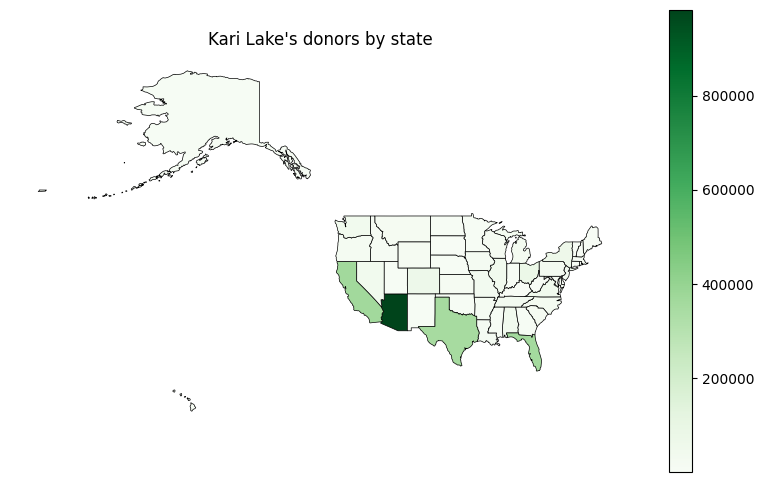

In [ ]:
# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust figure size as needed


merged_gdf.plot(column='total',        # Column to visualize
                cmap='Greens',         # Choose a colormap
                linewidth=0.5,         # Border line width
                edgecolor='black',     # Border line color
                legend=True,           # Show legend
                ax=ax)

ax.set_title("Kari Lake's donors by state")  # Set title
ax.set_axis_off()

plt.show()

In [ ]:
# Integrate state populations

state_pops = [{'state_full':'Pennsylvania','population':10353548},{'state_full':'California','population':30827105},{'state_full':'West Virginia','population':1432932},{'state_full':'Utah','population':2324051},{'state_full':'New York','population':16088135},{'state_full':'District of Columbia','population':575161},{'state_full':'Alaska','population':554003},{'state_full':'Florida','population':17339232},{'state_full':'South Carolina','population':4014460},{'state_full':'North Dakota','population':596093},{'state_full':'Maine','population':1110085},{'state_full':'Georgia','population':8220274},{'state_full':'Alabama','population':3917166},{'state_full':'New Hampshire','population':1120680},{'state_full':'Oregon','population':3370652},{'state_full':'Wyoming','population':441337},{'state_full':'Arizona','population':5541976},{'state_full':'Louisiana','population':3570548},{'state_full':'Indiana','population':5192579},{'state_full':'Idaho','population':1376400},{'state_full':'Connecticut','population':2869227},{'state_full':'Hawaii','population':1155905},{'state_full':'Illinois','population':9999469},{'state_full':'Massachusetts','population':5663723},{'state_full':'Texas','population':21866700},{'state_full':'Montana','population':850123},{'state_full':'Nebraska','population':1476127},{'state_full':'Ohio','population':9207562},{'state_full':'Colorado','population':4509576},{'state_full':'New Jersey','population':7281310},{'state_full':'Maryland','population':4815202},{'state_full':'Virginia','population':6745054},{'state_full':'Vermont','population':524482},{'state_full':'North Carolina','population':8155099},{'state_full':'Arkansas','population':2312273},{'state_full':'Washington','population':6024689},{'state_full':'Kansas','population':2229316},{'state_full':'Oklahoma','population':3010698},{'state_full':'Wisconsin','population':4612300},{'state_full':'Mississippi','population':2277599},{'state_full':'Missouri','population':4775612},{'state_full':'Michigan','population':7914602},{'state_full':'Rhode Island','population':887594},{'state_full':'Minnesota','population':4389033},{'state_full':'Iowa','population':2450103},{'state_full':'New Mexico','population':1638989},{'state_full':'Nevada','population':2413326},{'state_full':'Delaware','population':783543},{'state_full':'Puerto Rico','population':2724903},{'state_full':'Kentucky','population':3483900},{'state_full':'South Dakota','population':669255},{'state_full':'Tennessee','population':5384473}]

df_pops = pd.DataFrame(state_pops)

print(df_pops)






              state_full  population
0           Pennsylvania    10353548
1             California    30827105
2          West Virginia     1432932
3                   Utah     2324051
4               New York    16088135
5   District of Columbia      575161
6                 Alaska      554003
7                Florida    17339232
8         South Carolina     4014460
9           North Dakota      596093
10                 Maine     1110085
11               Georgia     8220274
12               Alabama     3917166
13         New Hampshire     1120680
14                Oregon     3370652
15               Wyoming      441337
16               Arizona     5541976
17             Louisiana     3570548
18               Indiana     5192579
19                 Idaho     1376400
20           Connecticut     2869227
21                Hawaii     1155905
22              Illinois     9999469
23         Massachusetts     5663723
24                 Texas    21866700
25               Montana      850123
2

In [ ]:
# Merge DataFrames on 'state_name'

merged_df = pd.merge(df_totals, df_pops, on='state_full')

merged_df['rate_per_100k'] = (merged_df['total'] / merged_df['population']) * 100000

print(merged_df)


    count      state_full      total  population  rate_per_100k
0    3615         Arizona  982480.27     5541976   17727.977710
1    1412      California  368161.00    30827105    1194.276920
2     796         Florida  357787.49    17339232    2063.456386
3     877           Texas  351496.53    21866700    1607.451193
4     440            Ohio   78632.16     9207562     853.995444
5     306        Colorado   69627.07     4509576    1543.982627
6     264        New York   62282.93    16088135     387.135799
7     336      Washington   46646.07     6024689     774.248596
8     172          Nevada   46423.88     2413326    1923.647282
9     347        Virginia   44985.70     6745054     666.943511
10    318        Illinois   41649.58     9999469     416.517917
11    112         Alabama   39523.78     3917166    1008.989152
12    107       Tennessee   33453.54     5384473     621.296457
13    176        Missouri   33003.76     4775612     691.089645
14    218      New Jersey   32329.28    

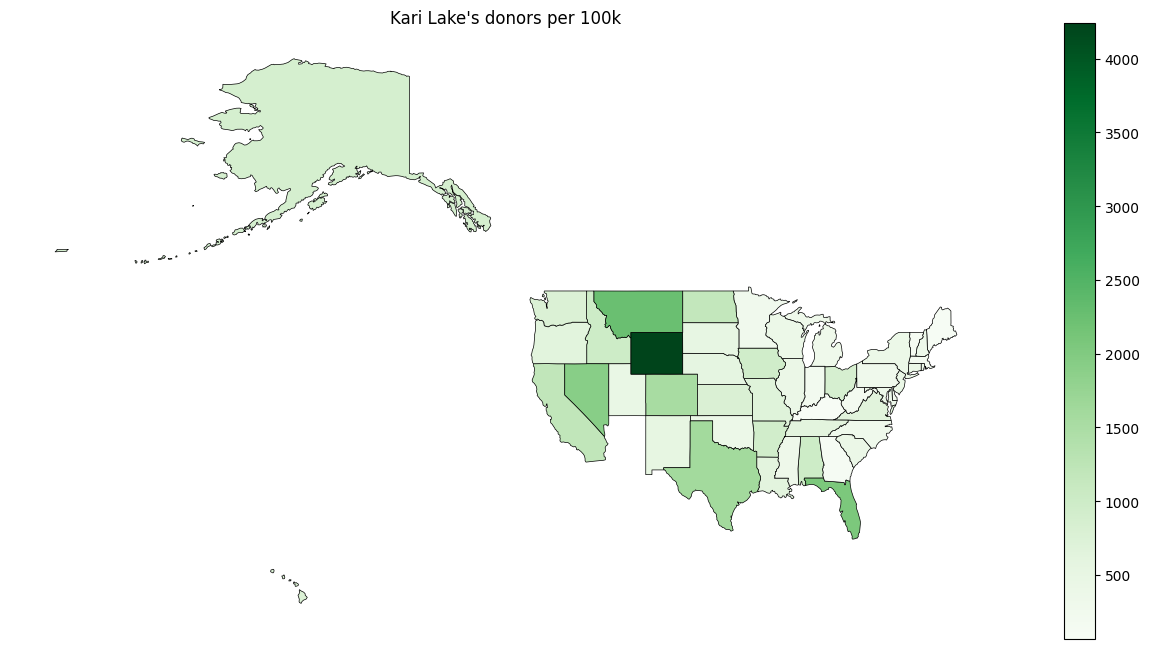

In [ ]:

# Remove Arizona

mask = merged_df['state_full'] == 'Arizona'
merged_df = merged_df[~mask]


merged_gdf_rates = gdf.merge(merged_df, left_on='name', right_on='state_full', how='left')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

merged_gdf_rates.plot(column='rate_per_100k',  # Column to visualize
                cmap='Greens',          # Choose a colormap
                linewidth=0.5,          # Border line width
                edgecolor='black',      # Border line color
                legend=True,            # Show legend
                ax=ax)

ax.set_title("Kari Lake's donors per 100k")
ax.set_axis_off()

plt.show()

In [ ]:

# Save the GeoDataFrame to a KML file and download
merged_gdf_rates.to_file("kari_lake_donations.geojson", driver='GeoJSON')

files.download("kari_lake_donations.geojson")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Where is Ruben Gallego spending his money?

In [ ]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from google.colab import files


base_url = "https://api.open.fec.gov/v1/schedules/schedule_b/by_recipient/"
params = {
    "per_page": 100,
    "cycle": 2024,
    "committee_id": "C00558627",
    "api_key": "Jsgf2JIgwAJCB08QzagJ3bwUwbWC9jMyrCGoq1d4"
}

all_results = []
page = 1

while True:
    params['page'] = page

    response = requests.get(base_url, params=params)
    data = response.json()

    if 'results' not in data or not data['results']:
        break

    all_results.extend(data['results'])
    page += 1


df = pd.DataFrame(all_results)

In [ ]:
# What do we have?

print(df)
df2 = df

In [ ]:
# Sort from largest to smallest
df2 = df2.sort_values(by='recipient_disbursement_percent', ascending=False)
df2

,committee_id,committee_total_disbursements,count,cycle,memo_count,memo_total,recipient_disbursement_percent,recipient_name,total
287,C00558627,12446226.33,61,2024,0,0.00,39.91,AISLE 518 STRATEGIES,4966960.80
217,C00558627,12446226.33,5,2024,0,0.00,13.20,SKDKNICKERBOCKER LLC,1643292.88
70,C00558627,12446226.33,35,2024,0,0.00,9.98,"RWT PRODUCTION, LLC",1242235.32
285,C00558627,12446226.33,171,2024,0,0.00,4.79,ACTBLUE TECHNICAL SERVICES,596006.78
129,C00558627,12446226.33,83,2024,0,0.00,2.34,"PAYCHEX, INC",291458.11
...,...,...,...,...,...,...,...,...,...
348,C00558627,12446226.33,0,2024,4,2300.00,0.00,THE CONGRESSIONAL CLUB,0.00
347,C00558627,12446226.33,1,2024,0,0.00,0.00,A&E BUILDERS,300.00
346,C00558627,12446226.33,8,2024,0,0.00,0.00,"BROWN, JANET",255.00
345,C00558627,12446226.33,0,2024,1,255.62,0.00,SHELLY'S BACK ROOM,0.00


In [ ]:
df2 = df2[['recipient_name', 'recipient_disbursement_percent', 'total']].head()
df2

,recipient_name,recipient_disbursement_percent,total
287,AISLE 518 STRATEGIES,39.91,4966960.80
217,SKDKNICKERBOCKER LLC,13.20,1643292.88
70,"RWT PRODUCTION, LLC",9.98,1242235.32
285,ACTBLUE TECHNICAL SERVICES,4.79,596006.78
129,"PAYCHEX, INC",2.34,291458.11


from matplotlib import pyplot as plt
df2['recipient_disbursement_percent'].plot(kind='hist', bins=20, title='recipient_disbursement_percent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('recipient_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='recipient_disbursement_percent', y='total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['recipient_disbursement_percent'].plot(kind='line', figsize=(8, 4), title='recipient_disbursement_percent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df2['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['recipient_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='recipient_disbursement_percent', y='recipient_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['recipient_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='total', y='recipient_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)